<a href="https://colab.research.google.com/github/ac547/Applied-Statistics/blob/master/Machine_Learning_and_Stock_Valuation_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Machine Learning and Stock Valuation Research </center></h1>
<h3><center> Andres Castellano </center></h3>
<h4><center> CS675 Spring 2020, Prof. Ioannis Koutis </center></h4>
<h4><center>New Jersey Institute of Technology</center></h4>


# Premise

In his 1776 book *The Wealth of Nations*, Adam Smith first noted that the operation of a market system creates a curious unity between private interests and social interests. Firms and resource suppliers seeking to further their own self interests and operating within the framework of a highly competitive market system, will simulataneously as though guided by an __invisible hand__, promote the public or social interest. It follows at least in theory that the social interest and a firm's own self interests are positively correlated and at a very fundamental level, a firm's value is tied to the value that it can provide to society. For example, imagine the valuation of a firm that succesfuly develops an effective vaccine against Covid-19.   

It comes as no surprise that the ability to succesfully calculate a firm's valuation is highly profitable. For that reason, over the last two hundred years several theories have been developed to accomplish this. Most of these theories fall within two categories, fundamental and technical analysis. 

#### Fundamental Analysis

Fundamental Analysis essentially tries to understand the foundation, or structure of a firm. Fundamental analysis looks at things such as "Who is the CEO" and how much cash does the firm has at hand. The Capital Asset Pricing Model goes to great extents to calculate all types of ratios and measurements of a firm's health. It looks at a firm's assets, liabilities, and its ability to operate. However, it does little to operate within the framework of social benefit. Needless to say, investors such as Warren Buffet have found great success using this approach, yet not everyone who has tried has succeded. There are plenty of horror stories. 

One possible downfall of using fundamental analysis is that it is based on snap shot information such as the balance sheet and income statements. Investors in Motorola Stock, at the beginning of 2006, had plenty of reasons to feel comfortable regarding the health of their investments. Students enetering college in the next five years do not know what Motorola is.

#### Technical Analysis

Technical analysts, essentially look at a stock's price chart as a function of time. The premise is similar to charting the trajectory of a projectile on a cartesian plane. It is well understood that you can tell everything regarding a projectile based on where it is on its flight path. However, this only works since there are fundamental laws (Gravity) determining the trajectory of objects through space. This is not the case for stock prices as a function of time. Although there is plenty of evidence supporting the effectiveness of technical analysis there is plenty of evidence contradicting those results. 
Throughout the 1990's Apple stock was relatively flat. There was no technical analysis suggesting it would become what it is today.

#### Loosely defined Thesis: The Invisible Hand and Supply and Demand 

There are many interesting data sets exploring price changes as a function of nano seconds or sentiment analysis trying to understand how industry participants _sense_ a particular stock or industry. 

This exploration, however is of a different type. This notebook will take a more naïve approach. 

__Suppose that there is an actual correlation between the betterment of a firm's self interest and the betterment of social interests.
That is, theories such as the law of supply and demand actually apply, and we can perfectly value a firm according to how much society actually demands its offerings.__

1) The idea of an efficient market states that a security is priced by interactions between market participants. Which implies that the price of Apple stock isn't really determined by the social benefit Apple provides but by what market participants presume Apple stock is worth. 

One assumption of this paper is that stock traders and financial institutions are a middle man between a stock's true value and its percevied value. 

2) If we can use alternative data to understand what society actually needs, we can accurately calculate the real value of a firm as opposed to the percevied value as seen on NASDAQ for example. 

3) Naturally, the type of analysis porposed here is not appropriate for short term valuations. That is, a sufficiently long timeline is needed to observe any real deviations between a perceived valuation and a real valuation for any stock. 

Perhaps an example can help:

Consider for example the market for orange juice options. A firm tracks the amount of sunlight received by orange trees in Florida and determines that given the current exposure to sunlight, there will be a low yield of oranges and thus a limited supply of oranges next term. A firm can explot this information to but the right to buy cheap oranges next term and sell them at a premium. Simple. 

Now consider you sitting in front of your laptop and tracking shipments of Silicon (Used in micro processors), Outputs of Silver and Tungsten from all mines around the world, political activity in countries producing these elements, as well as the consumer sentiment towards the next gen iPhone, how much money they are saving, how old their phone is, what their friends have to say, how often they replace their iPhone, and what they have for breakfast. In addition, you also track how much money apple is spending on R&D, what Samsung has to say about it and every single piece of information anyone can offer regarding Apple in any corner of the world. It stands to reason that if we know everything about Apple, we should be able to price Apple perfectly. 


# Realistic Considerations

1) In an ideal world, time permitting, we should be able to accomplish this task for any particular stock by leveraging the power of big data. In this paper however, we will focus on one simple example in order to develop a proof of concept. If succesful, the study can be scaled further.

2) Advances on the theory and computational resources today make it possible to train algorithms with hundreds or thousands of attributes (features (variables)). However, in depth research needs to be conducted to select appropriate features such as monetary transactions, social media sentiment, and  a plethora of other options. 

This notebook however, will focus on social interest as calculated by Google Search History and Stock Price Historical Data as provided by Yahoo finance.

3) **This is a live set of considerations that may need to be updated as we go**


## The Problem

### Can we train an algorithm to succesfully predict the price of Apple stock using the price of its main competitor as well as Google Search History information for both companies and its products?

This a supervised learning problem and more specifically a regression problem. 

## Performance Measure




<h3><center> RMSE = $\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h({x}^{(i)})-y^{(i)})^{2} }$ </h3></center>



The RMSE, root mean square error is a common performance measure for regression problems as it gives a higher weight to larger errors. 

In [ ]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

## The Data



In [ ]:
my_path = r'C:\Users\Castellano\Documents\Spring2020\CS675'

APPLE_PATH = my_path
SAMSUNG_PATH = my_path
INTEREST_PATH = my_path

def load_apple_data(apple_path=APPLE_PATH):
    csv_path = os.path.join(apple_path, "AAPL.csv" )
    return pd.read_csv(csv_path, parse_dates=True, index_col=0)

def load_samsung_data(samsung_path=SAMSUNG_PATH):
    csv_path = os.path.join(samsung_path, "Samsung.csv" )
    return pd.read_csv(csv_path, parse_dates=True, index_col=0)

def load_interest_data(interest_path=INTEREST_PATH):
    csv_path = os.path.join(interest_path, "Google_Interest.csv" )
    return pd.read_csv(csv_path, parse_dates=True, index_col=0)


In [ ]:
apple = load_apple_data()
samsung = load_samsung_data()
interest = load_interest_data()

### Apple

Apple stock historical price data obtained from Yahoo finance. 

In [ ]:
apple.info()
apple.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2004-02-01 to 2020-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       197 non-null    float64
 1   High       197 non-null    float64
 2   Low        197 non-null    float64
 3   Close      197 non-null    float64
 4   Adj Close  197 non-null    float64
 5   Volume     197 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-02-01,1.604286,1.721429,1.550000,1.708571,1.479106,1230507600
2004-03-01,1.721429,2.010000,1.685714,1.931429,1.672033,2906528800
2004-04-01,1.920714,2.112857,1.820714,1.841429,1.594121,2232543600
2004-05-01,1.857143,2.055714,1.821429,2.004286,1.735105,1326068800
2004-06-01,1.985000,2.442143,1.972143,2.324286,2.012128,2056808600


### Samsung

Samsung stock historical price data obtained from Yahoo finance. 

In [ ]:
samsung.info()
samsung.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2004-02-01 to 2020-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       195 non-null    float64
 1   High       195 non-null    float64
 2   Low        195 non-null    float64
 3   Close      195 non-null    float64
 4   Adj Close  195 non-null    float64
 5   Volume     195 non-null    float64
dtypes: float64(6)
memory usage: 10.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-02-01,10480.0,11420.0,10060.0,10900.0,0.161625,443615000.0
2004-03-01,10900.0,11440.0,10140.0,11440.0,0.169632,537540000.0
2004-04-01,11400.0,12760.0,10980.0,11140.0,0.165184,716285000.0
2004-05-01,11140.0,11280.0,8960.0,10120.0,0.150059,769845000.0
2004-06-01,10160.0,10340.0,8420.0,9540.0,0.141459,741425000.0


### Google Interest Data

This data was dowloaded from Google Search Trends service.


In [ ]:
interest.info()
interest.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2004-01-01 to 2020-05-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Apple           197 non-null    int64 
 1   iPhone          197 non-null    object
 2   Android         197 non-null    object
 3   Samsung Galaxy  197 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.7+ KB


,Apple,iPhone,Android,Samsung Galaxy
Month,,,,
2004-01-01,10,<1,<1,<1
2004-02-01,9,<1,<1,<1
2004-03-01,8,<1,<1,<1
2004-04-01,9,<1,<1,<1
2004-05-01,9,<1,<1,<1


### A bit of cleanup 
...to replace "<1" values. Google measures interest as an index integer. However, Google search interest for the iPhone before 2006 is naturally non existent. In situations like this, the Google Search Interest service provides a vlaue of 0.5 which for our purposes we will replace will 0.1.

In [ ]:
interest.iPhone.replace('<1',0.1,inplace=True)
interest.Android.replace('<1',0.1,inplace=True)
interest['Samsung Galaxy'].replace('<1',0.1,inplace=True)

interest[['iPhone',
          'Android',
          'Samsung Galaxy']] = interest[['iPhone',
                                       'Android',
                                       'Samsung Galaxy']].astype('float64')

interest.info()
interest.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2004-01-01 to 2020-05-01
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Apple           197 non-null    int64  
 1   iPhone          197 non-null    float64
 2   Android         197 non-null    float64
 3   Samsung Galaxy  197 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 7.7 KB


,Apple,iPhone,Android,Samsung Galaxy
Month,,,,
2004-01-01,10,0.1,0.1,0.1
2004-02-01,9,0.1,0.1,0.1
2004-03-01,8,0.1,0.1,0.1
2004-04-01,9,0.1,0.1,0.1
2004-05-01,9,0.1,0.1,0.1


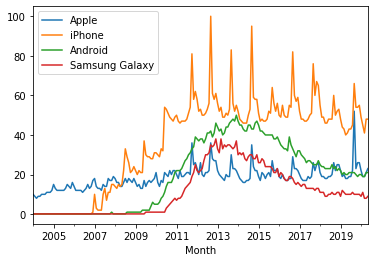

In [ ]:
interest[['Apple','iPhone','Android','Samsung Galaxy']].plot()

Text(0.5, 1.0, 'Samsung Stock Prices')

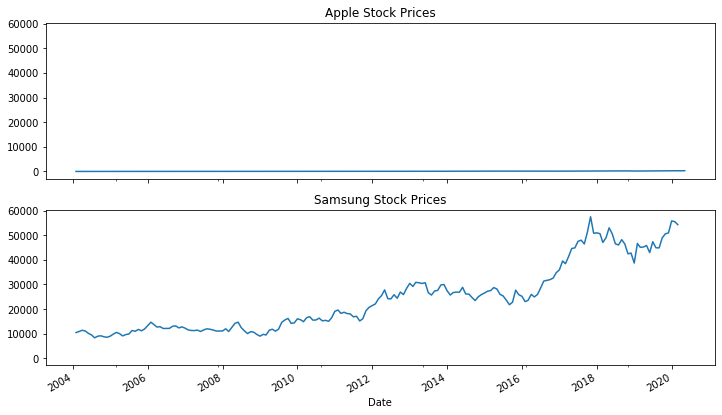

In [ ]:
fig, axes = plt.subplots(nrows= 2, ncols=1,
                        sharex=True,
                        sharey=True,
                        figsize=(12,7))
#interest[['Apple','iPhone','Android','Samsung Galaxy']].plot(ax=axes[0])
apple.Open.plot(ax=axes[0])
axes[0].set_title('Apple Stock Prices')
samsung.Open.plot(ax=axes[1])
axes[1].set_title('Samsung Stock Prices')

Apparently, the Samsung stock price data is listed in Korean (Won) currency. 
As of 5/10/2020 One U.S Dollar is approximately 1220 Korean Won.
Later, we will normalize these features but for the sake of visulaiztion here, we will just divide by 1220.

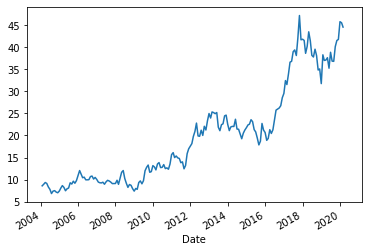

In [ ]:
samsung.Open = samsung.Open/1220
samsung.Open.plot()
samsung.Open = samsung.Open*1220

Text(0.5, 1.0, 'Samsung Stock Prices')

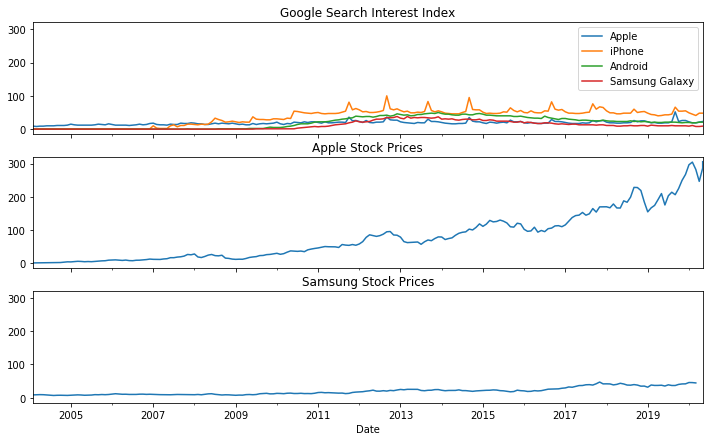

In [ ]:
fig, axes = plt.subplots(nrows= 3, ncols=1,
                        sharex=True,
                        sharey=True,
                        figsize=(12,7))
interest[['Apple','iPhone','Android','Samsung Galaxy']].plot(ax=axes[0])
axes[0].set_title('Google Search Interest Index')
apple.Open.plot(ax=axes[1])
axes[1].set_title('Apple Stock Prices')
samsung.Open = samsung.Open/1220
samsung.Open.plot(ax=axes[2])
samsung.Open = samsung.Open*1220
axes[2].set_title('Samsung Stock Prices')

## Feature Scaling

Machine Learning algorithms do not perform well when features are on significantly different scale. 
From the charts above it is easy to see that our Search Interest Indices are between 1 and 100 and so are our samsung prices once divided by 1000. Our apple stock prices however are in the range of 0 to 300. 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()



Before we scale everything, let's get an idea of what our training data will look like.

In [ ]:
samsung.rename(columns={'Open': 'Samsung Price'},
              inplace=True)
train = pd.merge(interest, samsung['Samsung Price'], left_index=True, right_index=True, how='inner')


In [ ]:
train.head()

,Apple,iPhone,Android,Samsung Galaxy,Samsung Price
2004-02-01,9,0.1,0.1,0.1,10480.0
2004-03-01,8,0.1,0.1,0.1,10900.0
2004-04-01,9,0.1,0.1,0.1,11400.0
2004-05-01,9,0.1,0.1,0.1,11140.0
2004-06-01,10,0.1,0.1,0.1,10160.0


In [ ]:
apple.rename(columns={'Open' : 'Apple Price'},
            inplace=True)

train = pd.merge(train, apple['Apple Price'], left_index=True, right_index=True, how='inner') 

In [ ]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2004-02-01 to 2020-05-01
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Apple           196 non-null    int64  
 1   iPhone          196 non-null    float64
 2   Android         196 non-null    float64
 3   Samsung Galaxy  196 non-null    float64
 4   Samsung Price   194 non-null    float64
 5   Apple Price     196 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 10.7 KB


,Apple,iPhone,Android,Samsung Galaxy,Samsung Price,Apple Price
2004-02-01,9,0.1,0.1,0.1,10480.0,1.604286
2004-03-01,8,0.1,0.1,0.1,10900.0,1.721429
2004-04-01,9,0.1,0.1,0.1,11400.0,1.920714
2004-05-01,9,0.1,0.1,0.1,11140.0,1.857143
2004-06-01,10,0.1,0.1,0.1,10160.0,1.985000


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

train_set = train_set.dropna()

stocks = train_set.drop("Apple Price", axis=1)
stocks_labels = train_set['Apple Price'].copy()
stocks_labels = stocks_labels.dropna()
stocks = stocks.dropna()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

attribs = list(stocks)

pipeline = ColumnTransformer([
    ("num", MinMaxScaler(), attribs),])

In [ ]:
stocks_prepared = pipeline.fit_transform(stocks)


In [ ]:
stocks_prepared.shape
#stocks_labels.shape


(154, 5)

## Training the Algorithm

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(stocks_prepared, stocks_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = stocks.iloc[:5]
some_labels = stocks_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ -2.48384125   3.4803329   92.68279647  99.35567573 202.82977397]


In [ ]:
print("Labels:", list(some_labels))

Labels: [2.292857, 20.5, 130.279999, 78.309998, 167.169998]


In [ ]:
from sklearn.metrics import mean_squared_error

stock_predictions = lin_reg.predict(stocks_prepared)
lin_mse = mean_squared_error(stocks_labels, stock_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20.984538710805335

In [ ]:
apple.tail().describe()

,Apple Price,High,Low,Close,Adj Close,Volume
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,284.994000,309.290002,259.204001,288.341995,287.601926,6.806709e+08
std,23.925460,11.932874,36.807808,24.306501,24.531945,5.996545e+08
min,246.500000,294.529999,212.610001,254.289993,253.603500,3.351198e+07
25%,282.279999,304.000000,236.899994,273.359985,271.976532,2.283308e+08
50%,286.250000,310.350006,256.369995,293.799988,293.006836,7.549628e+08
75%,304.299988,310.350006,285.850006,310.130005,309.292755,8.165308e+08
max,305.640015,327.220001,304.290009,310.130005,310.130005,1.570018e+09


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(stocks_prepared, stocks_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
stock_predictions = tree_reg.predict(stocks_prepared)
tree_mse = mean_squared_error(stocks_labels, stock_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, stocks_prepared, stocks_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_scores

array([-1241.11055412, -1570.40693797,  -233.35198626,  -283.73681288,
         -86.83150677,  -359.02901174,  -278.69115968,  -258.20292736,
        -133.20763173,  -490.63965021])

In [ ]:
lin_scores = cross_val_score(lin_reg, stocks_prepared, stocks_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_scores

lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [29.09786891 24.81762507 16.14757267 23.0324711  15.78836746 21.64347079
 20.50423879 30.28485487 15.34433339 16.47711635]
Mean: 21.313791939430565
Standard Deviation: 5.227949853971594


In [ ]:
display_scores(tree_scores)

Scores: [-1241.11055412 -1570.40693797  -233.35198626  -283.73681288
   -86.83150677  -359.02901174  -278.69115968  -258.20292736
  -133.20763173  -490.63965021]
Mean: -493.5208178727081
Standard Deviation: 473.8265194831927


### Ensemble (Random Forest Regressor)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(stocks_prepared, stocks_labels)

forest_scores = cross_val_score(forest_reg, stocks_prepared, stocks_labels,
                         scoring="neg_mean_squared_error", cv=10)


forest_rmse_scores = np.sqrt(-forest_scores)


In [ ]:
display_scores(forest_rmse_scores)

Scores: [17.54763635 17.38380548 11.25273305 13.94080522 12.0053719  14.86401302
 17.31494485 20.55947435 10.03449371 15.12546913]
Mean: 15.00287470620537
Standard Deviation: 3.118682574054477


## Testing the Algorithm

### The RandomForest Regressor on The Test Data

In [ ]:
stocks_test = test_set.drop("Apple Price", axis=1)
test_labels = test_set['Apple Price'].copy()
test_labels = stocks_labels.dropna()
stocks_test = stocks.dropna()

test_prepared = pipeline.transform(stocks_test)

forest_scores = cross_val_score(forest_reg, test_prepared, test_labels,
                         scoring="neg_mean_squared_error", cv=10)


forest_rmse_scores = np.sqrt(-forest_scores)


In [ ]:
display_scores(forest_rmse_scores)

Scores: [18.7802254  17.80429041 11.1846665  13.10606918 12.4280426  16.10229582
 17.9243827  19.41136731  9.15030437 16.11451723]
Mean: 15.2006161510477
Standard Deviation: 3.334647032229709


## Discussion

Although no one should be investing all their savings based on this model just yet, the results are relatively positive. We knew from the onset that we did not have access to all the appropriate data we could have used and the time lines are questionable. We do know that at least within the scope of this paper, the algorithm generalized well to the unseen data. While the analysis here may seem obvious or intuitive, "Apple and Samsung are competitors, naturally their stocks are somewhat correlated." It may serve as a starting point for more rigorous analysis.